In [31]:
DATASET_PATH = "../data/evaluation/eicu_100.jsonl"

In [32]:
import json

def load_dataset_from_jsonl(
    file_path: str,
):
    try:
        data = []
        with open(file_path, "r", encoding="utf-8") as file:
            for line_num, line in enumerate(file, 1):
                line = line.strip()
                if not line:
                    continue
                try:
                    item = json.loads(line)
                    data.append(item)
                except json.JSONDecodeError as e:
                    raise ValueError(f"Error parsing JSON at line {line_num}: {e}")

        if not data:
            raise ValueError("The JSONL file is empty.")
        return data
    except FileNotFoundError:
        raise FileNotFoundError(f"The file '{file_path}' was not found.")


dataset = load_dataset_from_jsonl(DATASET_PATH)

In [33]:
import pandas as pd

df = pd.DataFrame(dataset)

In [38]:
df.keys()

Index(['answer', 'answer_explanation', 'id', 'sql_result', 'db_id', 'question',
       'template', 'query', 'value', 'q_tag', 't_tag', 'o_tag', 'tag',
       'department', 'importance', 'para_type', 'is_impossible', 'split',
       'classification'],
      dtype='object')

In [35]:
classification_count = df["classification"].value_counts()

<Axes: title={'center': 'Classification Distribution'}, ylabel='count'>

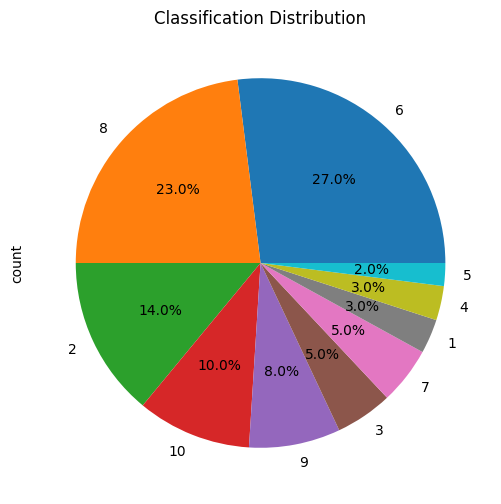

In [36]:
# Pie chart
classification_count.plot(
    kind="pie",
    title="Classification Distribution",
    autopct="%1.1f%%",
    figsize=(10, 6),
)